In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import spacy
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from collections import defaultdict

In [ ]:
uploaded=files.upload()

Saving prepared_data.csv to prepared_data.csv


In [ ]:
data=pd.read_csv('prepared_data.csv')

In [ ]:
data.head()

,SMS_TEXT,ENGLISH_TEXT
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...


In [ ]:
print("Data Shape",data.shape)

Data Shape (2000, 2)


<h3>EDA</h3>

<h4> Checking Missing Values </h4>

In [104]:
data.isnull().sum()

SMS_TEXT        0
ENGLISH_TEXT    0
dtype: int64

There are no missing values in the dataset.

<h4> Functions used in EDA </h4>

In [117]:
"""This function calculates the length of sentence."""
def calculating_length_of_sentence_with_spaces(data):
    length_of_sentence=[]
    for index in range(len(data)):
        length_of_sentence.append(len(data.loc[index]))
    return length_of_sentence    
        


In [96]:
"""This function calculates the number of words in the each sentence"""
def calculating_number_of_words(data):
    number_of_words=[]
    for index in range(len(data)):
        number_of_words.append(len(data.loc[index].split()))
    return number_of_words

In [118]:
"""This function counts the frequency of each character in the dataframe"""
def counting_number_of_characters(data):
    charcter_list=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
                   'q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F',
                   'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V',
                   'W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    occurence_dictionary={}               
    for letters in charcter_list:
        occurence_dictionary[letters]=data.str.count(letters).sum()
    return occurence_dictionary   

In [138]:
#Reference: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
""" This function calculates top 25 frequently occuring stopwords in the dataframe."""
def calculating_stop_words(data):
    corpus=[]
    text= data.str.split()
    text=text.values.tolist()
    corpus=[word for i in text for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop_words:
           dic[word]+=1
    most_frequent=sorted(dic.items(),key=lambda x:x[1], reverse=True)[:25]
    x,y=zip(*most_frequent)
    plt.pyplot.figure(figsize=(10,15))
    plt.pyplot.bar(x,y)
    plt.pyplot.xlabel("Stopwords")
    plt.pyplot.ylabel("Frequency")
    plt.pyplot.title("Frequnecy of Stopwords")
    plt.pyplot.show()     


In [ ]:
"""This function calculates pos tags using spacy library """
def get_pos_tags(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [120]:
#Reference: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
"""This function calculates the top frequently occuring pos tags in the dataframe"""
def calculating_pos_tags(data):
    nlp=spacy.load("en_core_web_sm")
    ent=data.apply(lambda x: get_pos_tags(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    x,y=map(list,zip(*count))
    plt.pyplot.figure(figsize=(10,15))
    sns.barplot(x=y,y=x)
    plt.pyplot.xlabel('Count')
    plt.pyplot.ylabel('POS Tages')
    plt.pyplot.title('Frequency of POS')
    plt.pyplot.show()


<h4> 1. SMS_TEXT </h4>

<h5> Length of Sentence </h5>

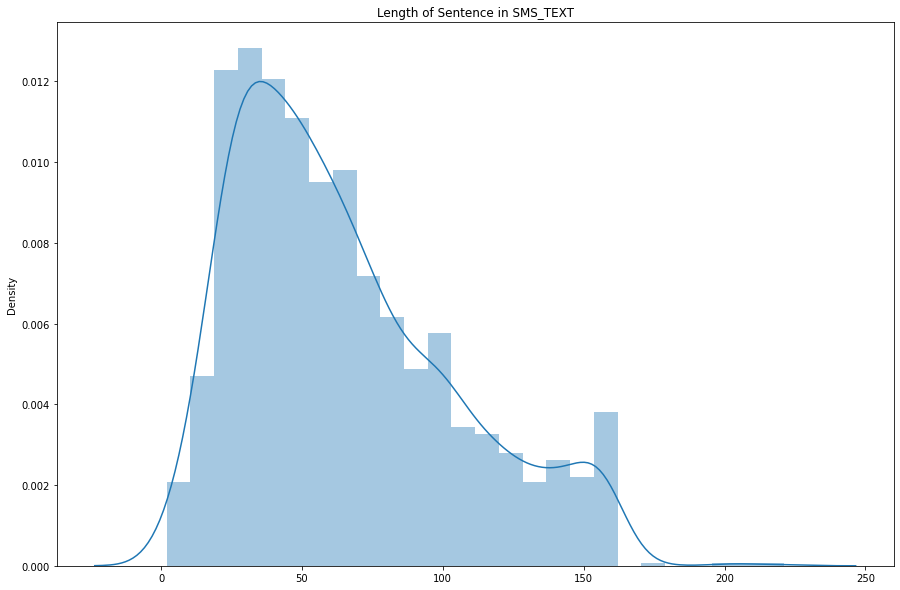

In [85]:
sms_text_length=calculating_length_of_sentence_with_spaces(data['SMS_TEXT'])
plt.pyplot.figure(figsize=(15,10))
sns.distplot(sms_text_length)
plt.pyplot.title("Length of Sentence in SMS_TEXT")
plt.pyplot.show()

From the above distribution plot we can see that most of the length of sentences are in range of 20-80. Very few sentence length are from 150.

<h5> Number of Words </h5>

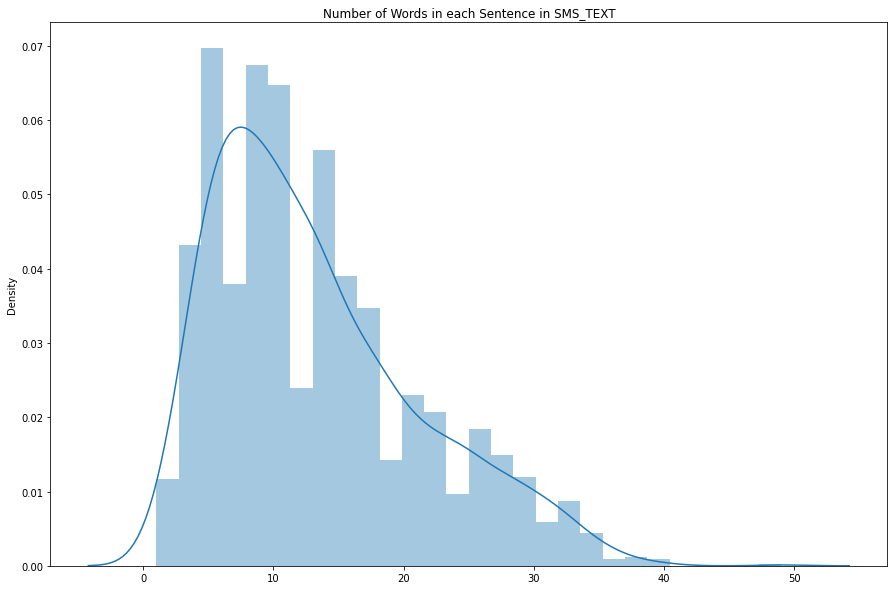

In [98]:
sms_number_of_words=calculating_number_of_words(data['SMS_TEXT'])
plt.pyplot.figure(figsize=(15,10))
sns.distplot(sms_number_of_words)
plt.pyplot.title("Number of Words in each Sentence in SMS_TEXT")
plt.pyplot.show()

Most of sentences have words between 5-20. Very few sentences have words more than 30.

<h5>Calculating the percentile Values.</h5> 

1. SMS_TEXT_Length

In [ ]:
"""Printing percentile values between 0 to 100 with step size 10."""
for i in range(0,101,10):
    print(i,np.percentile(sms_text_length, i))

0 2.0
10 22.0
20 30.0
30 38.0
40 47.0
50 56.0
60 66.0
70 79.0
80 99.0
90 125.0
100 221.0


90th percentile value is 125 while 100th percentile value is 221. Lets print the percentile values between 90 and 100.

In [ ]:
"""Printing the percentile values between 90 to 100 with stepsize 1"""
for i in range(90,101):
    print(i,np.percentile(sms_text_length, i))

90 125.0
91 129.0
92 134.0
93 138.0
94 142.0
95 147.0
96 151.0
97 154.0
98 157.0
99 159.0
100 221.0


The 99th percentile value for length of sentence is 159 while 100th percentile value is 221. Lets print the percentile values between 99 and 100.  

In [ ]:
"""Printing the percentile values between 99 and 100"""
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(sms_text_length, i))a

99.1 159.0
99.2 159.00800000000004
99.3 160.0
99.4 160.0
99.5 160.0
99.6 160.0
99.7 160.0
99.8 161.01999999999953
99.9 202.0030000000006
100 221.0


The 99.8th percentile value for length of sentence is 161, 99.9th percentile value is 202. There is huge differnce between 99.8th percentile and 99.9th percentile. So we should consider max_length for SMS_text=161.

There are no sentences length between 161 and 202. 

2. SMS_NUMBER_OF_WORDS

In [ ]:
"""Printing percentile values from 0 to 100 with step size 10"""
for i in range(0,101,10):
    print(i,np.percentile(sms_number_of_words, i))

0 1.0
10 5.0
20 6.0
30 8.0
40 10.0
50 11.0
60 13.399999999999864
70 16.0
80 20.0
90 25.0
100 49.0


From the above we can see there is a huge gap between 90th percentile and 100 the percentile. Lets print the percentile values between 90-100

In [ ]:
"""Printing the percentile values between 90 to 100 with stepsize 1"""
for i in range(90,101):
    print(i,np.percentile(sms_number_of_words, i))

90 25.0
91 26.0
92 27.0
93 28.0
94 28.0
95 29.0
96 30.0
97 31.0
98 32.01999999999998
99 34.0
100 49.0


From the above, we can there is a gap between 99 percentile and 100 percentile. Lets print percentile values betwen 99 and 100.

In [ ]:
"""Printing the percentile values between 99 and 100"""
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(sms_number_of_words, i))

99.1 35.0
99.2 35.0
99.3 35.0
99.4 35.0
99.5 36.0
99.6 36.003999999999905
99.7 37.0
99.8 37.003999999999905
99.9 39.001000000000204
100 49.0


99.9th percentile have 39 words while 100th percentile have 49 words in the sentence. Maximum number of words in the senetenc should be 39.

<h5>Occurences of Each Character in SMS_TEXT</h5>

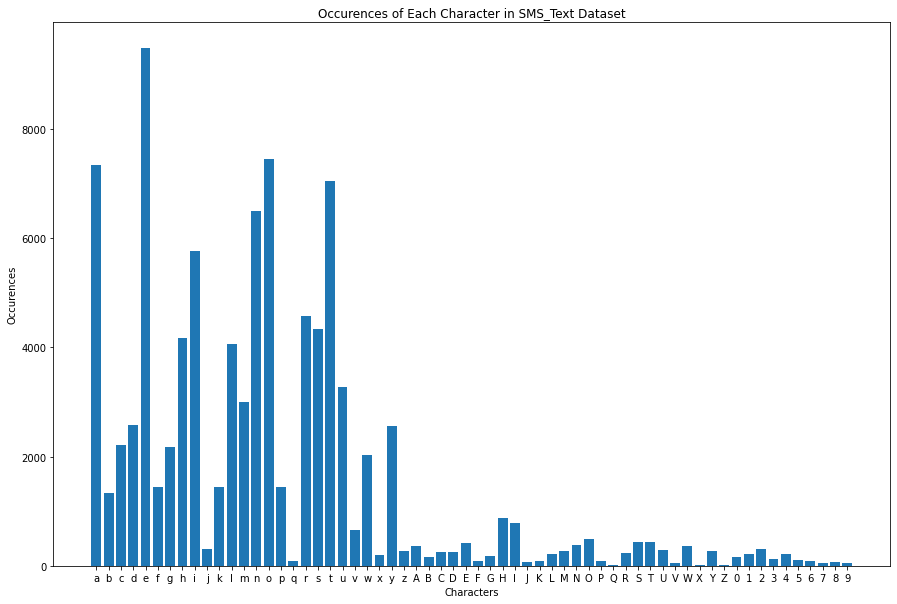

In [119]:
sms_text_dictionary=counting_number_of_characters(data['SMS_TEXT'])
plt.pyplot.figure(figsize=(15,10))
plt.pyplot.bar(sms_text_dictionary.keys(),sms_text_dictionary.values())
plt.pyplot.xlabel("Characters")
plt.pyplot.ylabel("Occurences")
plt.pyplot.title("Occurences of Each Character in SMS_Text Dataset")
plt.pyplot.show()

From the above character 'e' has most frequency. Followed by the character 'a','t' and 'o'.

<h5> Frequency of POS_Tags </h5>

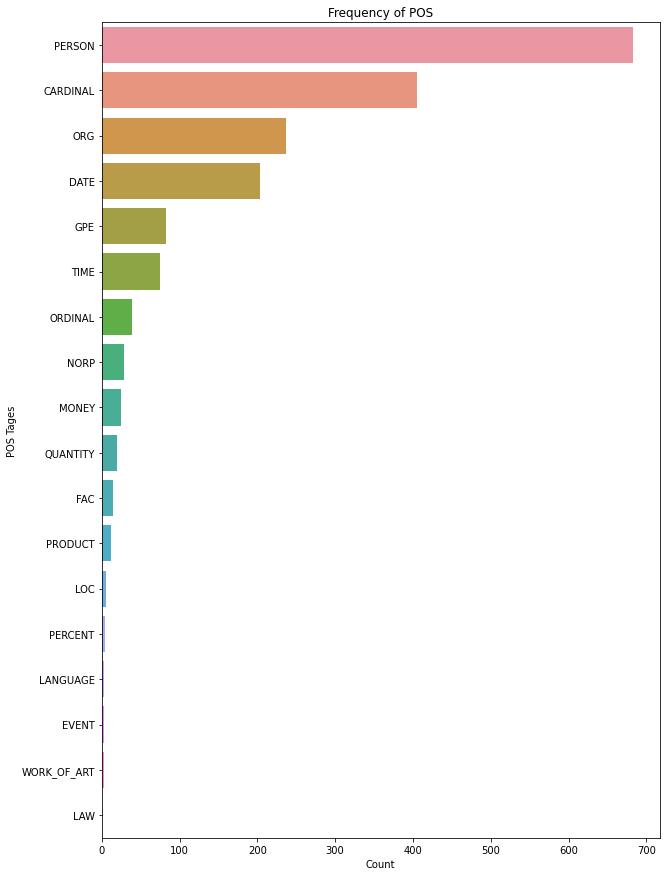

In [121]:
calculating_pos_tags(data['SMS_TEXT'])

Here from the above plot we can see that POS tag with Person has most frequency. It has frequency of around 700 in the SMS_Text column.

<h5> Most 25 frequently occuring stop words in the SMS_TEXT </h5>

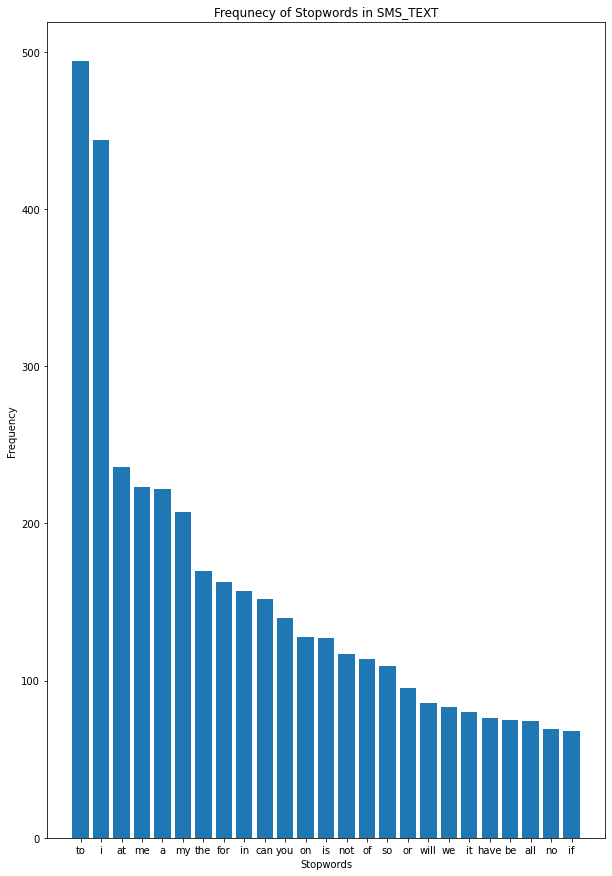

In [103]:
   
calculating_stop_words(data['SMS_TEXT'])


From the above plot we can see that stopwords like 'to' and 'i' have most frequency in SMS_Text column.

<h4> 2. English_TEXT </h4>

<h5> Length of Sentence </h5>

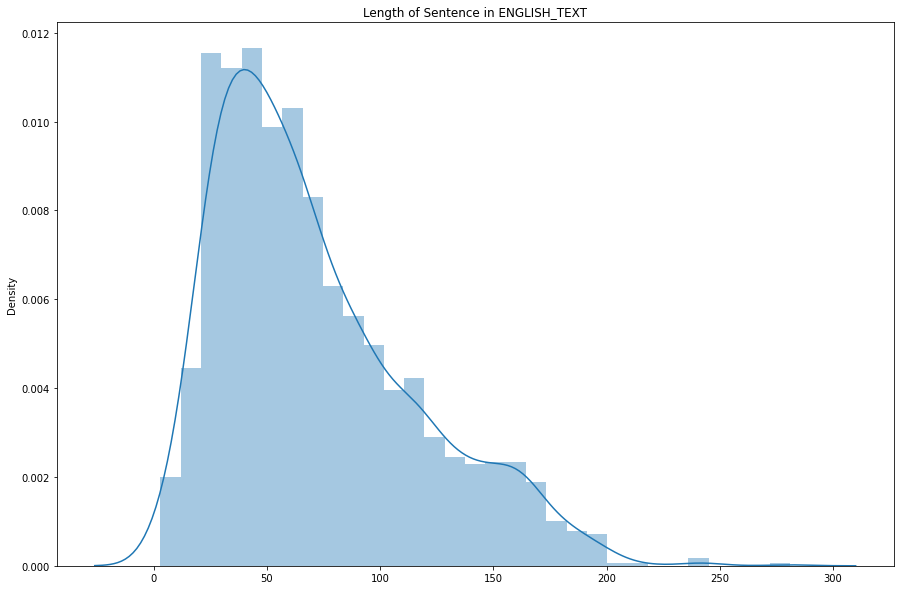

In [126]:
eng_text_length=calculating_length_of_sentence_with_spaces(data['ENGLISH_TEXT'])
plt.pyplot.figure(figsize=(15,10))
sns.distplot(eng_text_length)
plt.pyplot.title("Length of Sentence in ENGLISH_TEXT")
plt.pyplot.show()

From the above plot we can that there are very few sentences whose length is more than 200.

<h5> Number of Words </h5>

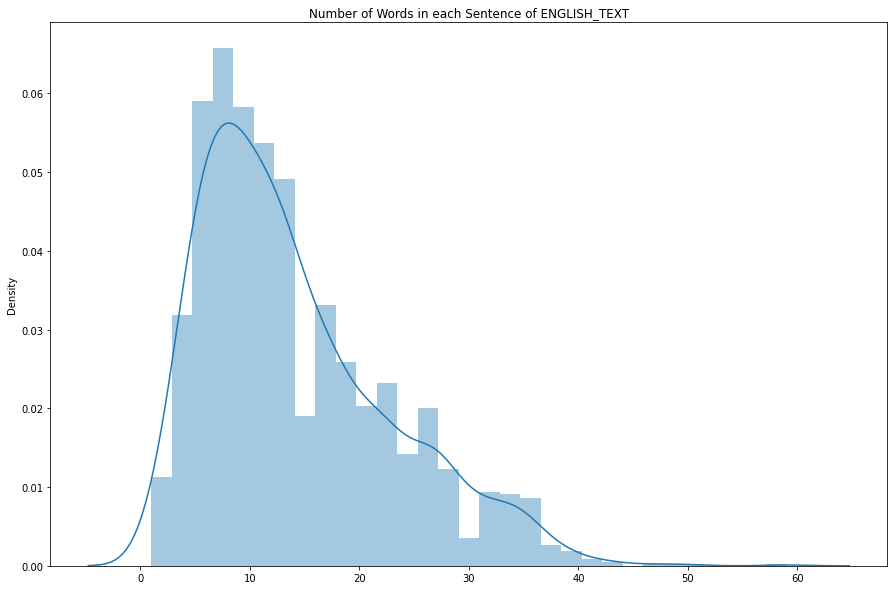

In [125]:
english_number_of_words=calculating_number_of_words(data['ENGLISH_TEXT'])
plt.pyplot.figure(figsize=(15,10))
sns.distplot(english_number_of_words)
plt.pyplot.title("Number of Words in each Sentence of ENGLISH_TEXT")
plt.pyplot.show()

From the above plot we can that there are very few sentences whose numbers of words are more than 40.

<h5> Calculating Percentile Values </h5>

1. English Sentence Length

In [127]:
"""Printing percentile values between 0 to 100 with step size 10."""
for i in range(0,101,10):
    print(i,np.percentile(eng_text_length, i))

0 3.0
10 25.0
20 33.0
30 42.0
40 50.0
50 61.0
60 72.0
70 87.0
80 108.20000000000005
90 140.0
100 281.0


90th percentile values is 140 while 100th percentile value is 281. Lets try to print percentile values between 90 to 100.

In [130]:
"""Printing the percentile values between 90 to 100 with stepsize 1"""
for i in range(90,101):
    print(i,np.percentile(eng_text_length, i))

90 140.0
91 144.0
92 149.0
93 154.0
94 156.0
95 162.0
96 165.0
97 170.0
98 179.01999999999998
99 190.01
100 281.0


99th percentile value is 190 while 100th percentile value is 281. Lets try to print values between 99 to 100 percentile.

In [129]:
"""Printing the percentile values between 99 and 100"""
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(eng_text_length, i))

99.1 192.0
99.2 192.01600000000008
99.3 196.00700000000006
99.4 197.0
99.5 198.00499999999988
99.6 200.0
99.7 200.0209999999995
99.8 215.04999999999882
99.9 241.0030000000006
100 281.0


99.7th percentile value is 200 while 99.8th percentile value is 215. Very few sentences have length more than 200 so max_length of english sentence would be 200.

2. English Number of Words

In [131]:
"""Printing percentile values between 0 to 100 with step size 10."""
for i in range(0,101,10):
    print(i,np.percentile(english_number_of_words, i))

0 1.0
10 5.0
20 7.0
30 8.0
40 10.0
50 12.0
60 14.0
70 17.0
80 22.0
90 27.0
100 59.0


In [132]:
"""Printing the percentile values between 90 to 100 with stepsize 1"""
for i in range(90,101):
    print(i,np.percentile(english_number_of_words, i))

90 27.0
91 28.0
92 29.0
93 29.070000000000164
94 31.0
95 32.0
96 33.0
97 34.0
98 35.01999999999998
99 38.0
100 59.0


In [133]:
"""Printing the percentile values between 99 and 100"""
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(english_number_of_words, i))

99.1 38.0
99.2 38.00800000000004
99.3 39.0
99.4 39.0
99.5 40.0
99.6 41.003999999999905
99.7 42.00299999999993
99.8 43.00599999999986
99.9 48.00200000000041
100 59.0


<h5> Occurence of Each Character in English Text</h5>

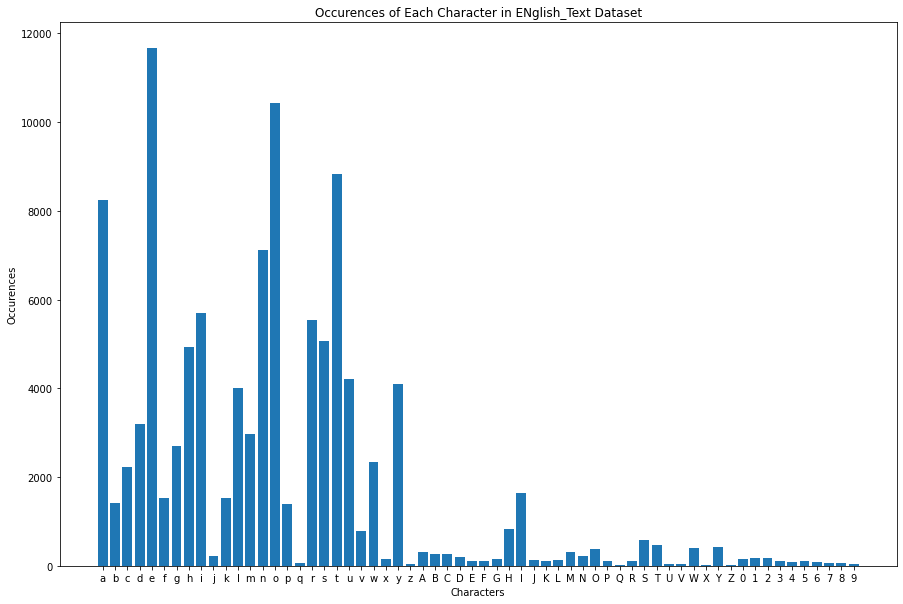

In [135]:
eng_text_dictionary=counting_number_of_characters(data['ENGLISH_TEXT'])
plt.pyplot.figure(figsize=(15,10))
plt.pyplot.bar(eng_text_dictionary.keys(),eng_text_dictionary.values())
plt.pyplot.xlabel("Characters")
plt.pyplot.ylabel("Occurences")
plt.pyplot.title("Occurences of Each Character in ENglish_Text Dataset")
plt.pyplot.show()

Characters like 'e','o','a' and 't' have most frequency in english text columns.

<h5> Frequency of POS_Tags </h5>

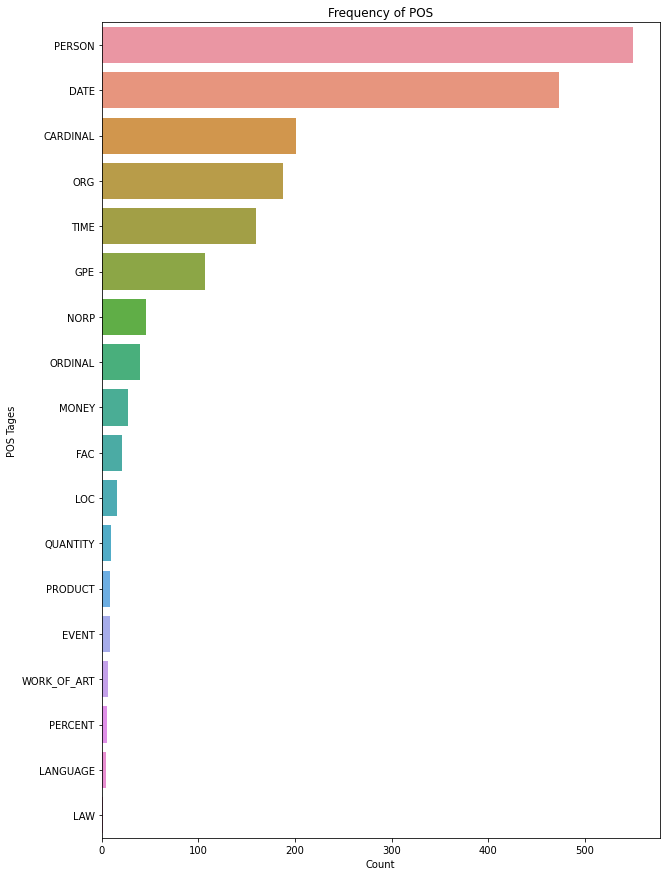

In [136]:
calculating_pos_tags(data['ENGLISH_TEXT'])

From the above plot we can see that POS tags with Person has most frequency in English_Text. It has frequency of around 500.

<h5> Most 25 Frequently occuring English Text </h5>

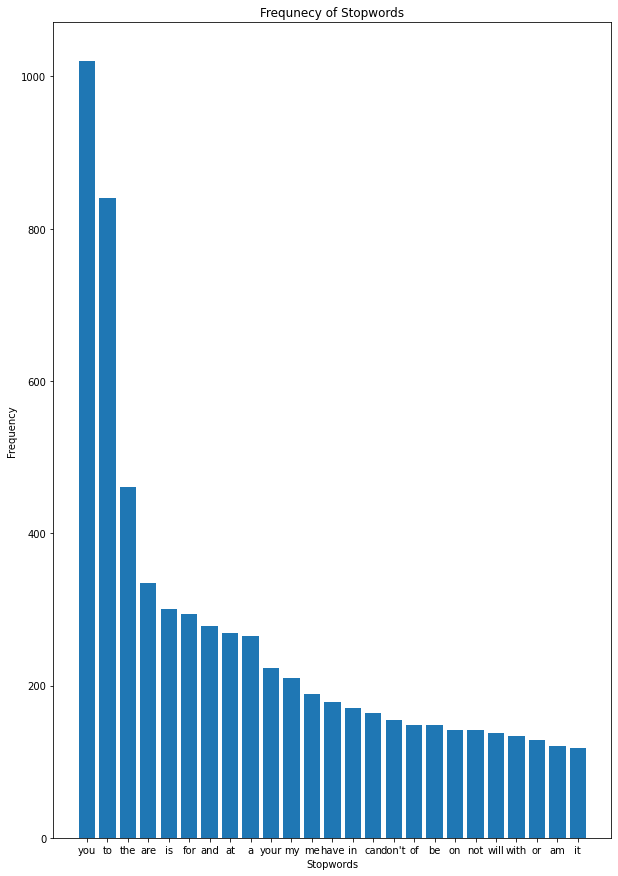

In [139]:
calculating_stop_words(data['ENGLISH_TEXT'])

From the above plot we can see that 'you' stopword has occured most of the times in th English_text.